# Lab Assignment Seven: Recurrent Network Architectures

Minging Li, Jiayin Liu, Tianlei Xu, He Zhou   
  May 11, 2018

# 1. Preparation

## 1.1 Data Preparation

We use the wine review dataset in this project (https://www.kaggle.com/zynicide/wine-reviews/data). The dataset contains 13 variables, country, description, designation, points, price, province, region_1, region_2, taster_name, taster_twitter_handle, title, rariety, and winery. Total observations are 3000. The variable points is numerical and all other variables are characteristic. Points refers to review points, scaled from 0-100, most of which are higher than 80. The variable description contains a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc. 

The classification task is to classify the review (points) of different wineries. To prepare the data for a binary classification, we create a new variable ppints by assigning value "normal" to points less than 87 and "good" to points higher than 87. Our task will be classify the wineries as "normal" or "good". Our final data set contains 13 characteristic variables, 1 classification variable "points" which have 2 levels and 12 explanatory variables. 

Note: Since we were not able to find an approriate dataset which contains at least 500 text documents for our classification purpose, we use the lmdb (Large Movie Review Dataset) dataset to show that we have practiced data processing using text files. We obtained the raw data of lmdb dataset (http://ai.stanford.edu/~amaas/data/sentiment/) and pre-processed the dataset to our needs. The pre-process we conducted were combining all the txt files, reading in files, deleting stop words and punctuations, extracting word index, and creating training and testing dataset. We didn't use the lmdb dataset in this lab because the CNN on this dataset was already shown in class. 

In [ ]:
# code for pre-process of lmdb dataset, this dataset is not the dataset we use for classification. 
# -*- coding: utf-8 -*-
# reference https://www.jianshu.com/p/6b16b592b08d
import os
import codecs
pos_location='/Users/jiayinliu/Desktop/study/ML/proj7/aclImdb/train/pos'
pos_files=os.listdir(pos_location)
neg_location='/Users/jiayinliu/Desktop/study/ML/proj7/aclImdb/train/neg'
neg_files=os.listdir(neg_location)
pos_all=codecs.open('/Users/jiayinliu/Desktop/study/ML/proj7/aclImdb/train/pos_all.txt','a',encoding='utf8')
neg_all=codecs.open('/Users/jiayinliu/Desktop/study/ML/proj7/aclImdb/train/neg_all.txt','a',encoding='utf8')
all=[]
for file in pos_files:
    whole_location=os.path.join(pos_location,file)
    with open(whole_location,'r',encoding='utf8') as f:
        line=f.readlines()
        all.extend(line)
for file in all:
    pos_all.write(file)
    pos_all.write('\n')
alls=[]
for file in neg_files:
    whole_location=os.path.join(neg_location,file)
    with open(whole_location,'r',encoding='utf8') as f:
        line=f.readlines()
        alls.extend(line)
for file in alls:
    neg_all.write(file)
    neg_all.write('\n')
    
    from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import collections
import pandas as pd
import numpy as np
import os
import codecs

pos_list=[]
with open('/Users/jiayinliu/Desktop/study/ML/proj7/aclImdb/train/pos_all.txt','r',encoding='utf8')as f:
    line=f.readlines()
    pos_list.extend(line)
neg_list=[]
with open('/Users/jiayinliu/Desktop/study/ML/proj7/aclImdb/train/neg_all.txt','r',encoding='utf8')as f:
    line=f.readlines()
    neg_list.extend(line)
#创建标签
label=[1 for i in range(12500)]
label.extend([0 for i in range(12499)])
#评论内容整合
content=pos_list.extend(neg_list)
content=pos_list

seq=[]
seqtence=[]
stop_words=set(stopwords.words('english'))
for con in content:
    words=nltk.word_tokenize(con)
    line=[]
    for word in words:
        if word.isalpha() and word not in stop_words:
            line.append(word)
    seq.append(line)
    seqtence.extend(line)
    
    tokenizer = Tokenizer()
tokenizer.fit_on_texts(content)
one_hot_results = tokenizer.texts_to_matrix(content, mode='binary')
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(seq)
final_sequences=sequence.pad_sequences(sequences,maxlen=800)

# 转换为numpy类型
label=np.array(label)
# 随机打乱数据
indices=np.random.permutation(len(final_sequences))
X=final_sequences[indices]
y=label[indices]
# 划分测试集和训练集
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

model=Sequential()
model.add(Embedding(89483,256,input_length=800))
model.add(LSTM(128,dropout=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xtrain,ytrain,batch_size=32,epochs=3,validation_data=(Xtest,ytest))

In [1]:
# Data preparation of our dataset
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import collections
import pandas as pd
import numpy as np
import os
import codecs
import warnings
import math
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

df = pd.read_excel('F:/Machine learning/review.xlsx')

F:\Anacoda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
content = df['description']

In [3]:
seq=[]
seqtence=[]
for con in content:
    words=nltk.word_tokenize(con)
    line=[]
    for word in words:
        if word.isalpha():
            line.append(word)
    seq.append(line)
    seqtence.extend(line)

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(content)
one_hot_results = tokenizer.texts_to_matrix(content, mode='binary')
word_index = tokenizer.word_index

In [5]:
len(word_index)

6986

In [6]:
word_index  

{'and': 1,
 'the': 2,
 'a': 3,
 'of': 4,
 'with': 5,
 'this': 6,
 'is': 7,
 'wine': 8,
 'in': 9,
 'flavors': 10,
 'it': 11,
 'to': 12,
 'fruit': 13,
 'on': 14,
 'aromas': 15,
 'palate': 16,
 'finish': 17,
 'that': 18,
 'acidity': 19,
 'drink': 20,
 'but': 21,
 'tannins': 22,
 'from': 23,
 'black': 24,
 'cherry': 25,
 "it's": 26,
 'ripe': 27,
 'has': 28,
 'are': 29,
 'for': 30,
 'red': 31,
 'by': 32,
 'notes': 33,
 'spice': 34,
 'rich': 35,
 'an': 36,
 'as': 37,
 'berry': 38,
 'fresh': 39,
 'its': 40,
 'oak': 41,
 'dry': 42,
 'now': 43,
 'nose': 44,
 'soft': 45,
 'full': 46,
 'plum': 47,
 'well': 48,
 'light': 49,
 'offers': 50,
 'sweet': 51,
 'fruits': 52,
 'texture': 53,
 'apple': 54,
 'blend': 55,
 'crisp': 56,
 'white': 57,
 'cabernet': 58,
 'blackberry': 59,
 'dark': 60,
 'while': 61,
 'pepper': 62,
 'shows': 63,
 'bodied': 64,
 'bright': 65,
 'vanilla': 66,
 'fruity': 67,
 'citrus': 68,
 'more': 69,
 'through': 70,
 'at': 71,
 'good': 72,
 'very': 73,
 'green': 74,
 'juicy': 75,
 

In [7]:
import json
jsObj = json.dumps(word_index)  
  
fileObject = open('F:/Machine learning/word_index.json', 'w')  
fileObject.write(jsObj)  
fileObject.close()  

In [8]:
sequences = tokenizer.texts_to_sequences(seq)
final_sequences=sequence.pad_sequences(sequences,maxlen=100)

In [9]:
df['points'] = pd.cut(df['points'],[0,87,1e6],labels=['normal','good']) # this creates a new variable
df.points.replace(to_replace = ['normal','good'],
                   value = range(2), inplace = True)

In [10]:
label=df['points']

## 1.2 Evaluation Metrics

We will use accuracy as the metric to judge the performance of our model. Accuracy refers to the closeness of a measured value to a known value. In our case, we mean the proportion of correct results that a classifier achieved. The possible classification cases include 4 cases. Either the classifier got a positive example labeled as positive (true positive), or it made a mistake and marked it as negative (false negative). Conversely, a negative example may have been (mis)labeled as positive (false positive), or correctly guessed negative (true negative). Accuracy is the proportion of the total true positive and true negative numbers in the total classification numbers. In the case of unbalanced prediction, such as 0 predicted positive or 0 predicted negative, accuracy would not be a good indicator of model performance. Precision, recall, or F-score would be good metrics. But in our case, our data are almost balanced, which means each class contains almost the same number of observations in the data set. The predicted matrics would also be balanced. Therefore, it is approapriate to use accuracy as our evaluation metric.

## 1.3 Data Splitting

We will use data splitting to create the test and training data set, with 80% training data and 20% testing data. Since our dataset have large number of oberservations, using data splitting is a resonable method. Considering the split ratio, with less training data, the parameter estimates have greater variance while With less testing data, the performance statistic will have greater variance (https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa). We would like a way to divide data such that neither variance is too high. The 80/20 is a good split ratio to be a trade-off of these two variances. 

In [11]:
label=np.array(label)
indices=np.random.permutation(len(final_sequences))
X=final_sequences[indices]
y=label[indices]
# split data into training and test data 
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [12]:
Xtrain.shape

(2400, 100)

In [13]:
Xtrain

array([[   0,    0,    0, ...,   67,  341,  223],
       [   0,    0,    0, ...,  779,  644,   10],
       [   0,    0,    0, ...,  111,   92,   17],
       ...,
       [   0,    0,    0, ..., 1002, 2559,    8],
       [   0,    0,    0, ...,  322,    5,   19],
       [   0,    0,    0, ...,  109,    2,   17]])

In [14]:
type(Xtrain)

numpy.ndarray

In [15]:
Xtrain.shape

(2400, 100)

In [16]:
ytrain

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
ytrain.shape

(2400,)

# 2. Modeling

## 2.1 Build two different recurrent network architectures 

We will build two different recurrent network architectures, LSTM and GRU. The embedding layer from scratch will be used in hte network. 

In [18]:
top_words = 7000

In [19]:
def predict_acc(p1):
    p3 = []
    for i in p1:
        if i > 0.5:
            p3.append(1)
        else:
            p3.append(0)
    return p3

In [20]:

from keras.models import Sequential, Input, Model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers.embeddings import Embedding
NUM_CLASSES = 1
EMBED_SIZE = 50
rnns = []
input_holder = Input(shape=(Xtrain.shape[1], ))
shared_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=100)(input_holder) # number of words in each sequence

for func, name in zip([SimpleRNN, LSTM, GRU],["SimpleRNN","LSTM","GRU"]):
    
    x = func(50,dropout=0.2, recurrent_dropout=0.2)(shared_embed)
    x = Dense(NUM_CLASSES, activation='sigmoid')(x)
    rnn=Model(inputs=input_holder,outputs=x)
    rnn.compile(loss='binary_crossentropy', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])
    
    print('=======',name,'========')
    print(rnn.summary())
    rnn.fit(Xtrain, ytrain, epochs=3, batch_size=64, validation_data=(Xtest, ytest))
    p1 = rnn.predict(Xtest)
    yhat = predict_acc(p1)
    acc = mt.accuracy_score(ytest,yhat)
    print("********ACCURACY IS BELOW**********")
    print(acc)
    
    

======= SimpleRNN ========
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 50)           350000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 355,101
Trainable params: 355,101
Non-trainable params: 0
_________________________________________________________________
None
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 4s 2ms/step - loss: 0.7186 - acc: 0.4975 - val_loss: 0.6884 - val_acc: 0.5217
Epoch 2/3
2400/2400 [==============================] - 3

## Adjust the hyper-parameters

##### Adjust activation function and optimizer
##### Activation funciton as [softmax, relu, tanh, sigmoid] 
##### Optimizer as [SGD, RMSprop, Adagrad]
##### We can get the best combination as 
##### LSTM, sigmoid, RMSprop

##### From the information above, we can see that LSTM has the best performance. So we choose to use LSTM

In [43]:
def rnn_1(Xtrain, ytrain, Xtest, ytest):
    NUM_CLASSES = 1
    EMBED_SIZE = 50
    input_holder = Input(shape=(Xtrain.shape[1],))
    shared_embed = Embedding(top_words, # input dimension (max int of OHE)
                    EMBED_SIZE, # output dimension size
                    input_length=100)(input_holder) # number of words in each sequence


    x1 = LSTM(50,dropout=0.2, recurrent_dropout=0.2)(shared_embed)
    x = Dense(NUM_CLASSES, activation='sigmoid')(x1)
    rnn_1=Model(inputs=input_holder,outputs=x)
    rnn_1.compile(loss='binary_crossentropy', 
                      optimizer='rmsprop', 
                      metrics=['accuracy'])
    history = rnn_1.fit(Xtrain, ytrain, epochs=3, batch_size=64, validation_data=(Xtest, ytest))
    p1 = rnn_1.predict(Xtest)
    yhat = np.array(predict_acc(p1))
    acc = mt.accuracy_score(ytest, yhat)
    cm = mt.confusion_matrix(ytest,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    
    return acc, history, cm

## 2.2 Add a second recurrent chain to the former model

In this section, we will add recurrent chain to your RNN using the best RNN parameters and architecture (LSTM).

In [44]:
def rnn_2(Xtrain, ytrain,Xtest, ytest):
    NUM_CLASSES = 1
    EMBED_SIZE = 50
    input_holder = Input(shape=(Xtrain.shape[1],))
    shared_embed = Embedding(top_words, # input dimension (max int of OHE)
                    EMBED_SIZE, # output dimension size
                    input_length=100)(input_holder) # number of words in each sequence


    x1 = LSTM(50,dropout=0.2, recurrent_dropout=0.2, return_sequences = True)(shared_embed)
    x2 = LSTM(50,dropout=0.5, recurrent_dropout=0.2)(x1)
    x = Dense(NUM_CLASSES, activation='sigmoid')(x2)
    rnn=Model(inputs=input_holder,outputs=x)
    rnn.compile(loss='binary_crossentropy', 
                      optimizer='rmsprop', 
                      metrics=['accuracy'])
    history = rnn.fit(Xtrain, ytrain, epochs=3, batch_size=64, validation_data=(Xtest, ytest))
    p1 = rnn.predict(Xtest)
    yhat = predict_acc(p1)
    acc = mt.accuracy_score(ytest,yhat)
    cm = mt.confusion_matrix(ytest,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    
    
    return acc, history, cm

### Visualize the performance of training and validation sets versus the training iterations. 

In [45]:
score_2, history_2, cm_2 = rnn_2(Xtrain, ytrain,Xtest, ytest)

Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 25s 10ms/step - loss: 0.6432 - acc: 0.6196 - val_loss: 0.5614 - val_acc: 0.7067
Epoch 2/3
2400/2400 [==============================] - 15s 6ms/step - loss: 0.4924 - acc: 0.7746 - val_loss: 0.5305 - val_acc: 0.7300
Epoch 3/3
2400/2400 [==============================] - 15s 6ms/step - loss: 0.3919 - acc: 0.8317 - val_loss: 0.5148 - val_acc: 0.7633


In [46]:
cm_2

array([[0.67028986, 0.32971014],
       [0.15740741, 0.84259259]])

Text(0.5,0,'epochs')

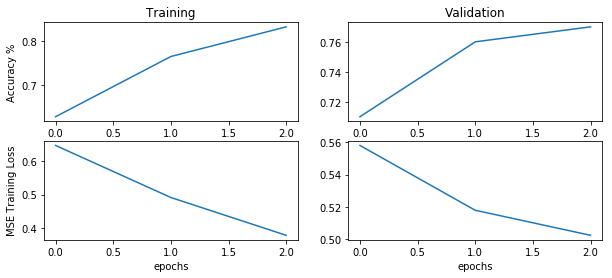

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history_2.history['acc'])
plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_2.history['val_acc'])
plt.title('Validation')
plt.subplot(2,2,3)
plt.plot(history_2.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')
plt.subplot(2,2,4)
plt.plot(history_2.history['val_loss'])
plt.xlabel('epochs')

From the above figures, the both the training error (use MSE as loss function) and test error decrease as the iteration increase.The training error is slightly lower than the test error which is resonable because the model fitting procedure tries to minimize the training error. The accuracy for both training and test data increase with iterations. The acccuracy of the validataion data is what we interested in, which increase from around 0.70 to 0.77. The accuracy for the validation data seems good. 

## 2.3 Visualize Results of RNN

We will visualize the results of the one recurrent layer and two recurrent layers RNNs that we trained using the accuracy. 

### One recurrent layer

In [25]:
score = []
history = []

X=final_sequences[indices]
y=label[indices]
for n in range(10):
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state = 42)
    score_new, history_new = rnn_1(Xtrain, ytrain, Xtest, ytest)
    score.append(score_new)
    history.append(history_new)

Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 10s 4ms/step - loss: 0.6668 - acc: 0.5733 - val_loss: 0.5816 - val_acc: 0.7150
Epoch 2/3
2400/2400 [==============================] - 8s 3ms/step - loss: 0.5394 - acc: 0.7396 - val_loss: 0.5181 - val_acc: 0.7733
Epoch 3/3
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4375 - acc: 0.8121 - val_loss: 0.4989 - val_acc: 0.7450
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 10s 4ms/step - loss: 0.6582 - acc: 0.5983 - val_loss: 0.6223 - val_acc: 0.6217
Epoch 2/3
2400/2400 [==============================] - 6s 3ms/step - loss: 0.5373 - acc: 0.7317 - val_loss: 0.5399 - val_acc: 0.7217
Epoch 3/3
2400/2400 [==============================] - 6s 2ms/step - loss: 0.4308 - acc: 0.8175 - val_loss: 0.5162 - val_acc: 0.7667
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 10s 

### History graph of one recurrent layer

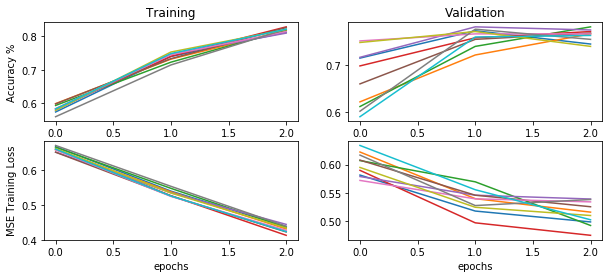

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
for i in range(len(history)):
    plt.plot(history[i].history['acc'])
    plt.ylabel('Accuracy %')
    plt.title('Training')

for i in range(len(history)):
    plt.subplot(2,2,2)
    plt.plot(history[i].history['val_acc'])
    plt.title('Validation')

for i in range(len(history)):
    plt.subplot(2,2,3)
    plt.plot(history[i].history['loss'])
    plt.ylabel('MSE Training Loss')
    plt.xlabel('epochs')

for i in range(len(history)):
    plt.subplot(2,2,4)
    plt.plot(history[i].history['val_loss'])
    plt.xlabel('epochs')

### Accuracy of one recurrent layer 

In [27]:
sum(score)/len(score)

0.7633333333333334

### One recurrent layer

In [55]:
score1 = []
history1 = []
cm1 = [[0,0],[0,0]]
X=final_sequences[indices]
y=label[indices]
for n in range(10):
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state = 42)
    score_new, history_new, cm_new = rnn_2(Xtrain, ytrain, Xtest, ytest)
    score1.append(score_new)
    history1.append(history_new)
    cm1 = cm1 + cm_new

Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 28s 12ms/step - loss: 0.6562 - acc: 0.6004 - val_loss: 0.5729 - val_acc: 0.7100
Epoch 2/3
2400/2400 [==============================] - 15s 6ms/step - loss: 0.5123 - acc: 0.7588 - val_loss: 0.5295 - val_acc: 0.7183
Epoch 3/3
2400/2400 [==============================] - 16s 7ms/step - loss: 0.3909 - acc: 0.8363 - val_loss: 0.6954 - val_acc: 0.6683
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 28s 12ms/step - loss: 0.6358 - acc: 0.6217 - val_loss: 0.6366 - val_acc: 0.6217
Epoch 2/3
2400/2400 [==============================] - 16s 7ms/step - loss: 0.4884 - acc: 0.7638 - val_loss: 0.5400 - val_acc: 0.7133
Epoch 3/3
2400/2400 [==============================] - 16s 7ms/step - loss: 0.3745 - acc: 0.8400 - val_loss: 0.5130 - val_acc: 0.7700
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] 

The accuracy for the one recurrent layer increases with iterations. The accuracy is about 0.7633. 

### Two recurrent layers

In [59]:
score2 = []
history2 = []
cm2 = [[0,0],[0,0]]
X=final_sequences[indices]
y=label[indices]
for n in range(10):
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state = 42)
    score_new, history_new, cm_new = rnn_2(Xtrain, ytrain, Xtest, ytest)
    score2.append(score_new)
    history2.append(history_new)
    cm2 = cm2 + cm_new

Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 36s 15ms/step - loss: 0.6569 - acc: 0.5988 - val_loss: 0.6013 - val_acc: 0.6633
Epoch 2/3
2400/2400 [==============================] - 17s 7ms/step - loss: 0.5146 - acc: 0.7558 - val_loss: 0.4977 - val_acc: 0.7617
Epoch 3/3
2400/2400 [==============================] - 17s 7ms/step - loss: 0.3925 - acc: 0.8358 - val_loss: 0.4914 - val_acc: 0.7633
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] - 34s 14ms/step - loss: 0.6362 - acc: 0.6262 - val_loss: 0.5711 - val_acc: 0.7083
Epoch 2/3
2400/2400 [==============================] - 16s 7ms/step - loss: 0.4858 - acc: 0.7792 - val_loss: 0.5391 - val_acc: 0.7533
Epoch 3/3
2400/2400 [==============================] - 16s 7ms/step - loss: 0.3724 - acc: 0.8433 - val_loss: 0.6082 - val_acc: 0.7067
Train on 2400 samples, validate on 600 samples
Epoch 1/3
2400/2400 [==============================] 

In [52]:
cm2

array([[1.66666667, 0.33333333],
       [0.61111111, 1.38888889]])

In [53]:
cm3 = cm2/2

In [29]:
score2

[0.7283333333333334,
 0.76,
 0.7766666666666666,
 0.7266666666666667,
 0.765,
 0.7683333333333333,
 0.7616666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7733333333333333]

In [30]:
sum(score2)/len(score2)

0.7593333333333333

##### The accuracy increases with iterations. The accuracy for the one recurrent layer is about 0.7633.  The accuracy for the one recurrent layer is about 0.7593. From the score, we can see that the one recurrent layer and  two recurrent layers are pretty close. The accuracy of one recurrent layer is a lightlly higher. 

## Statistical Comparison for One Recurrent Layer and Two recurrent Layer

### One layer

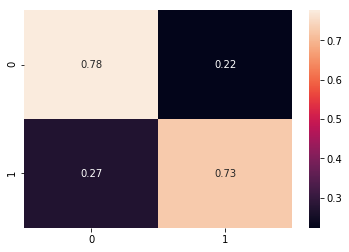

In [57]:
cm_1 = cm1/10
sns.heatmap(cm_1,annot=True, fmt='.2f')

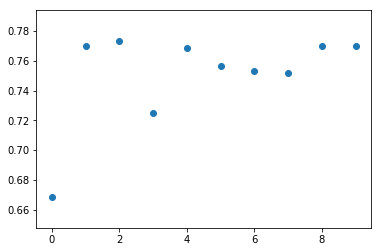

In [56]:
plt.scatter(range(10), score1)

### Two layer

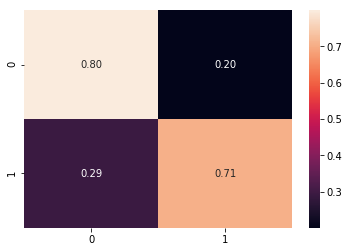

In [60]:
cm_2 = cm2/10
sns.heatmap(cm_2,annot=True, fmt='.2f')

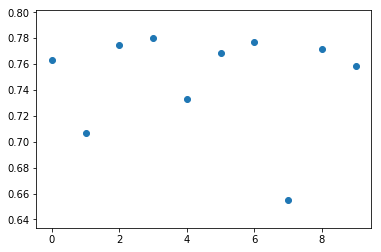

In [61]:
plt.scatter(range(10), score2)

The colored maps show the predicted and actual percentages of observations labeled as 0(normal) or 1(good). For the one layer, 22% of the "normal" oberservations are misclassified as "good" and 27% of the "good" observations are misclassified as "normal". For the one layer, 20% of the "normal" oberservations are misclassified as "good" and 29% of the "good" observations are misclassified as "normal".The misclassification rate(or accuracy, accuracy=1-[misclassification rate]) is the same for one layer and two layer. The one layer is a slighter better for classifying "good" observations and two layer is a slightly better for classifying "normal" observations. 

The scatter plots shows the accuracy for each of the 10 fold cross validation. The procedure was repeated for 10 times. The final score is the average of the ten scores.

# 3. Exceptional Work

We use t-SNE (or SVD) to visualize the word embeddings of a subset of words in our vocabulary. The t-SNE reduced the dimensions to 2 dimensions. In each dimension, the distance between each word represents how similar they are. Similar words are closer to each other. The noun, verbs,and adjectives are seperated. For example, in the lower right of the plot,  words like "It's", "It", "This", "The", "a", "an", and "along" are packed together. In the lower center, verbs are packed together, "give", "lead", "come", "make", "has", and "opens". In the middle, words "good", "fine", and "great" are packed together. In case of nouns, similar types are groups together. For example, in the upper left of the plot, words related to fruits are packed together, such as "apple", "pineapple", "melon", "tropical", "peach", and "lemon". In the upper right, words related to the characters of the wine are packed together, "flavor", "acidity", "texure", "feel", "tannins", and "finish". 

In [ ]:
import pandas as pd
df = pd.read_excel('D:/CSE/machine learning/review.xlsx') 
d = df['description']
words = []
for i in range(len(d)):
    d[i].replace(',', '')
    d[i].replace('.', '')
    k = d[i].split()
    for j in k:
        words.append(j)

In [ ]:
import collections
vocabulary_size = 200000
count = [['UNK', -1]]
count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
dictionary = dict()

for word, _ in count:
    dictionary[word] = len(dictionary)
data = list()
unk_count = 0
for word in words:
    if word in dictionary:
        index = dictionary[word]
    else:
        index = 0  # dictionary['UNK']
        unk_count = unk_count + 1
    data.append(index)

count[0][1] = unk_count
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
del words

In [ ]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buf = collections.deque(maxlen=span)
    for _ in xrange(span):
        buf.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in xrange(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in xrange(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buf[skip_window]
            labels[i * num_skips + j, 0] = buf[target]
        buf.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [ ]:
import tensorflow as tf
import collections
import numpy as np
batch_size = 128
embedding_size = 128  # 生成向量维度.
skip_window = 2       # 左右窗口.
num_skips = 2        # 同一个keyword产生label的次数.
num_sampled = 64      # 负样本抽样数.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels  = tf.placeholder(tf.int32, shape=[batch_size, 1])
  
    embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(
        tf.truncated_normal([vocabulary_size, embedding_size], stddev=1.0/np.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
    embed = tf.nn.embedding_lookup(embeddings, train_dataset)
    loss = tf.reduce_mean(
        tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases, inputs=embed,
                                   labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size))

    optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)

    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm


In [ ]:
num_steps = 10000
import random
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l
        if step % 2000== 0 and step > 0:
            print('Average loss at step %d: %f' % (step, average_loss / 2000))
            average_loss = 0
    word2vec = normalized_embeddings.eval()

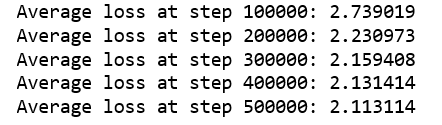

In [ ]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):  
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'  
    plt.figure(figsize=(18, 18))  # in inches  
    for i, label in enumerate(labels):  
        x, y = low_dim_embs[i, :]  
        plt.scatter(x, y)  
        plt.annotate(label,  
                 xy=(x, y),  
                 xytext=(5, 2),  
                 textcoords='offset points',  
                 ha='right',  
                 va='bottom')  
  
    plt.savefig(filename)  
  
try:  
    # 如果维度过高（比如1024维），建议先使用PCA降维到50维左右，再使用tsne继续降到2到3维  
  # 因为直接使用tsne效率比较低  
  # pylint: disable=g-import-not-at-top  
    from sklearn.manifold import TSNE  
    import matplotlib.pyplot as plt  
  
  # perplexity:一般设置成30即可，这个值一般设置在5到50之间，这个值不少很重要  
  # n_components:降到2维  
  # init:可选random或者pca, pca相比random更稳健一些  
  # n_iter:优化的最大迭代次数，至少要设置到200  
  # method:可以取两个值：1.barnes_hut（默认）：运行速度快，2.exact：运行慢，但精确  
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')  
    plot_only = 300  #图上显示点的个数  
    low_dim_embs = tsne.fit_transform(word2vec[:plot_only, :])  
  # 每个点的label，这里取的是word的名字  
    labels = [reverse_dictionary[i] for i in xrange(plot_only)]  
    plot_with_labels(low_dim_embs, labels)  
  
except ImportError:  
    print('Please install sklearn, matplotlib, and scipy to show embeddings.')  

In [ ]:
plt.show()

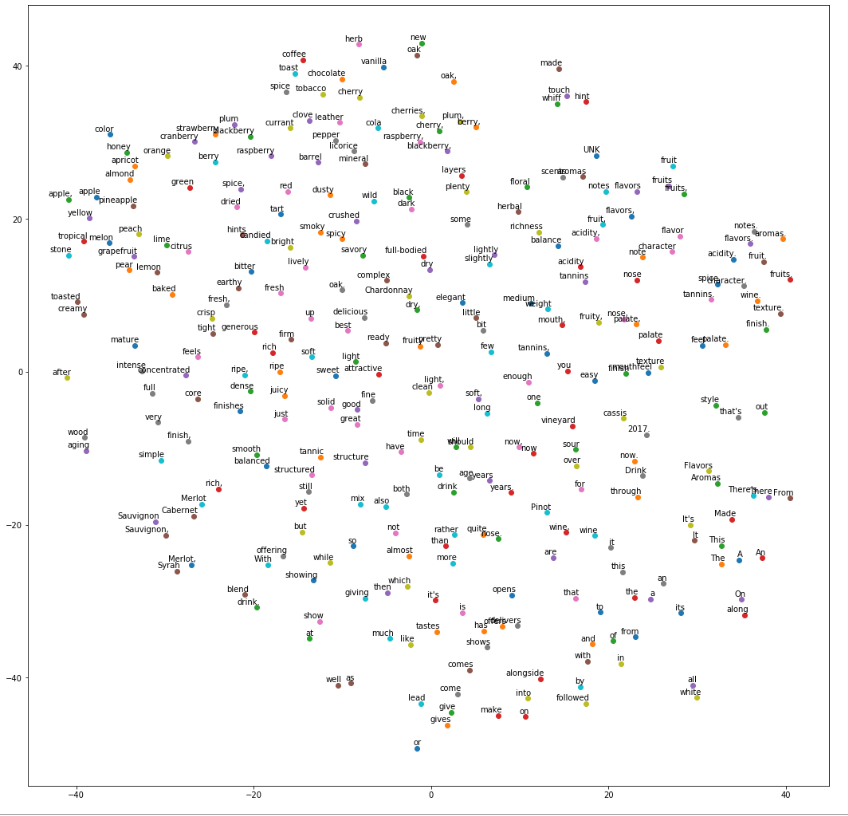

Reference from https://blog.csdn.net/qoopqpqp/article/details/76037334.